In [196]:
# import commands

import pandas as pd
import numpy as np
from scripts import project_functions_gc as pfg
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline

#### Seaborn figure theme

In [197]:
sns.set_theme(style="darkgrid",
              font_scale=1.3,
              palette='pastel'
             )
plt.rc('axes.spines', top=False, right=False)

# Exploratory Data Analysis

#### Research questions
1. Is there a relationship between providing more mental health resources and quality of employees' mental health in the tech industry?
2. Is there a relationship between employees' knowledge of the mental health resources available and the quality of mental health?

#### Variables in this dataset
- **treatment:** Have you sought treatment for a mental health condition?
- **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
- **benefits:** Does your employer provide mental health benefits?
- **care_options:** Do you know the options for mental health care your employer provides?
- **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
- **condition:** Whether respondents have a mental health condition or not, based on their response to **work_interfere**
- **resources:** Whether the amount of mental health resources provided by employers is good or poor
- **knowledge:** Respondents' level of knowledge about mental health resources available

## Data loading and processing

In [198]:
mh = pfg.load_and_process('../../data/raw/mentalhealthintech.csv')
mh

,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,condition,resources,knowledge
0,Yes,Sometimes,1,1,2,2,Yes,Good,Knowledgeable
1,Yes,Often,1,1,2,2,Yes,Good,Knowledgeable
2,Yes,Rarely,1,0,0,1,Yes,Good,Somewhat knowledgeable
3,No,N/A,0,0,2,0,No,Poor,Not knowledgeable
4,Yes,Rarely,1,1,0,0,Yes,Good,Somewhat knowledgeable
...,...,...,...,...,...,...,...,...,...
878,Yes,Sometimes,1,1,1,2,Yes,Good,Knowledgeable
879,Yes,N/A,2,2,2,2,No,Poor,Knowledgeable
880,Yes,Often,1,1,2,2,Yes,Good,Knowledgeable
881,Yes,Sometimes,1,1,2,2,Yes,Good,Knowledgeable


In [199]:
# this filtered version of the dataset only contains respondents who indicated they have a mental health condition
mh_filtered_condition = mh[mh['condition'] == 'Yes'].reset_index(drop=True)
mh_filtered_condition

,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,condition,resources,knowledge
0,Yes,Sometimes,1,1,2,2,Yes,Good,Knowledgeable
1,Yes,Often,1,1,2,2,Yes,Good,Knowledgeable
2,Yes,Rarely,1,0,0,1,Yes,Good,Somewhat knowledgeable
3,Yes,Rarely,1,1,0,0,Yes,Good,Somewhat knowledgeable
4,Yes,Sometimes,0,0,2,0,Yes,Poor,Not knowledgeable
...,...,...,...,...,...,...,...,...,...
682,Yes,Sometimes,1,2,2,0,Yes,Poor,Knowledgeable
683,Yes,Sometimes,1,1,0,2,Yes,Good,Knowledgeable
684,Yes,Sometimes,1,1,1,2,Yes,Good,Knowledgeable
685,Yes,Often,1,1,2,2,Yes,Good,Knowledgeable


## Overview of data

In [200]:
print(f'{mh.shape[0]} rows, {mh.shape[1]} columns')

883 rows, 9 columns


In [201]:
mh.dtypes

treatment           object
work_interfere      object
benefits             int64
care_options         int64
wellness_program     int64
seek_help            int64
condition           object
resources           object
knowledge           object
dtype: object

In [202]:
mh.describe(include=['object'])

,treatment,work_interfere,condition,resources,knowledge
count,883,883,883,883,883
unique,2,5,2,2,3
top,No,Sometimes,Yes,Poor,Knowledgeable
freq,447,328,687,601,595


## Pandas profiling

In [203]:
# ProfileReport(mh).to_notebook_iframe()

**Pandas profiling observations and notes**
- Ignored the duplicate row warning because it doesn't seem like a big problem in the context of this dataset
- More people have sought treatment for mental health issues than people who haven't sought treatment.
- A reasonable number of employees seem to have knowledge about available mental health resources.

In [204]:
# sorted labels and dictionnaries
sorted_response_labels = ['Not sure', 'Yes', 'No']
sorted_freq_labels = ['Never', 'Rarely', 'Sometimes', 'Often']
sorted_yn_dict = {0:"Don't know", 1:'Yes', 2:'No'}
sorted_knowledge_labels = ['Not knowledgeable', 'Somewhat knowledgeable', 'Knowledgeable']

In [237]:
# labels for graphs
knowledge_labels_fit = ['Not\nknowledgeable', 'Somewhat\nknowledgeable', 'Knowledgeable']

In [205]:
# survey question strings
treatment = 'Have you sought treatment for a mental health condition?'
work_interfere = 'If you have a mental health condition, do you feel that it interferes with your work?'
benefits = 'Does your employer provide mental health benefits?'
care_options = 'Do you know the options for mental health care your employer provides?'
wellness_program = 'Has your employer ever discussed mental health as part of an employee wellness program?'
seek_help = 'Does your employer provide resources to learn more about mental health issues and how to seek help?'

In [206]:
class display(object):
    # taken from class notes
    
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Measures of mental health

In [207]:
# getting counts and relative frequencies
cond_count = pfg.make_count_df(mh, 'condition')

treatmt_count = pfg.make_count_df(mh,'treatment').sort_values(by='treatment', ascending=False).reset_index(drop=True)

In [208]:
display('cond_count', 'treatmt_count')

,condition,count,rel_freq
0,Yes,687,77.8
1,No,196,22.2
,treatment,count,rel_freq
0,Yes,436,49.4
1,No,447,50.6


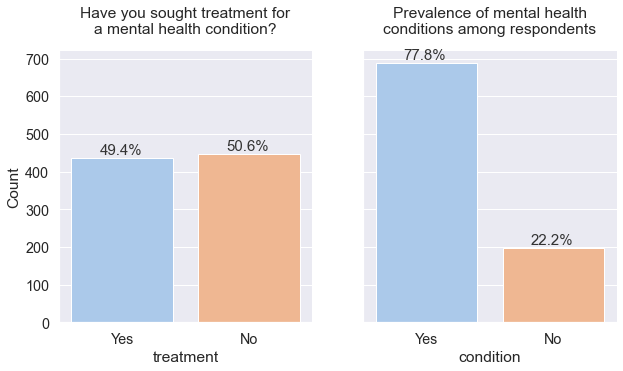

In [209]:
# references: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
            # https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
            # https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, axes = plt.subplots(1,2, figsize=(10,5),sharey=True)

# plot 1: treatment
ax0 = sns.barplot(ax=axes[0], data=treatmt_count, x='treatment', y='count', order=['Yes', 'No'])
pfg.rel_freq_label(ax0,0.22,10)
ax0.set_title('Have you sought treatment for\na mental health condition?', y=1.04)
ax0.set_ylabel('Count')

# plot 2: whether they have a mental health condition or not
ax1 = sns.barplot(ax=axes[1], data=cond_count, x='condition', y='count')
pfg.rel_freq_label(ax1,0.22,10)
ax1.set_title('Prevalence of mental health\nconditions among respondents', y=1.04)

for ax in axes.flat:
    ax.label_outer()

- Number of people who have or have not sought treatment for mental health is split roughly into half, but this does include people *without* a mental health condition.
- A significant number of respondents indicated having a mental health condition (77.8%).

## Seeking treatment

In [210]:
# reference: https://www.codeforests.com/2020/07/18/calculate-percentage-within-group/
cond_treatmt_grp = (
    mh.groupby(['condition', 'treatment'])
                    .count()
                    .loc[:, ['work_interfere']]
                    .rename(columns={'work_interfere':'count'})
                    .reindex(['Yes', 'No'], level=0)
                    .reindex(['Yes', 'No'], level=1)
                   )
pfg.rel_freq_within_grp(cond_treatmt_grp)
pfg.make_relfreq_col(cond_treatmt_grp)

cond_treatmt_idx = cond_treatmt_grp.reset_index() # created a version with index reset so it's easier to plot

display('cond_treatmt_grp', 'cond_treatmt_idx')

cond_treatmt_grp
                     count  withingrp_relfreq  rel_freq
condition treatment                                    
Yes       Yes          433               63.0      49.0
          No           254               37.0      28.8
No        Yes            3                1.5       0.3
          No           193               98.5      21.9

cond_treatmt_idx
  condition treatment  count  withingrp_relfreq  rel_freq
0       Yes       Yes    433               63.0      49.0
1       Yes        No    254               37.0      28.8
2        No       Yes      3                1.5       0.3
3        No        No    193               98.5      21.9

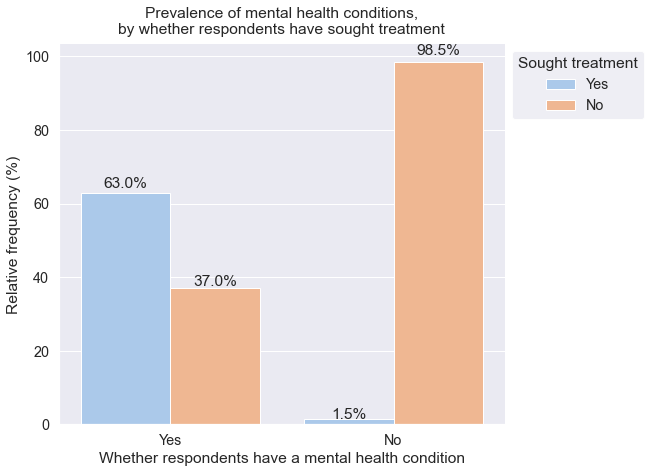

In [211]:
# reference: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

fig, ax = plt.subplots(figsize=(8,7))
g = sns.barplot(data=cond_treatmt_idx, x='condition', y='withingrp_relfreq', hue='treatment', order=('Yes', 'No'))

pfg.grouped_rel_freq_label(g,ax)
    
plt.ylabel('Relative frequency (%)') and plt.xlabel('Whether respondents have a mental health condition')
plt.title('Prevalence of mental health conditions,\nby whether respondents have sought treatment', y=1.01)
plt.legend(title='Sought treatment', edgecolor='1', bbox_to_anchor=(1,1))

- Out of the 687 people who indicated mental health issues, over half have sought treatment (63.03%).
- On the other hand, however, over a quarter of people with a mental health condition have not sought treatment (36.97%).
- I'm really focusing on the "Yes" category and ignoring the "No" category because treatment status is not really significant in the context of that group of respondents.
    - The difference between those who have/have not sought treatment in the group without a mental health condition is very large, so I am fairly certain there's not enough incorrect data (e.g., people indicate they don't have a mental health condition but say they have had treatment) to raise concerns.

## Mental health interfering with work

In [212]:
# counts and relative frequencies

# work_interfere + condition
cond_interfere = pfg.make_count_df(mh_filtered_condition,'work_interfere') # this only includes people with a mental health condition
cond_interfere['work_interfere'] = pd.Categorical(cond_interfere['work_interfere'], sorted_freq_labels)
cond_interfere = cond_interfere.sort_values('work_interfere').reset_index(drop=True)

# work_interfere + treatment
treatmt_interfere = (pfg.grouped_count_df(mh_filtered_condition, 'treatment', 'work_interfere')
                     .reindex(['Yes', 'No'], level=0)
                     .reindex(sorted_freq_labels, level=1)
                    )
pfg.rel_freq_within_grp(treatmt_interfere)
pfg.make_relfreq_col(treatmt_interfere)

treatmt_interfere_idx = treatmt_interfere.reset_index()

display('cond_interfere', 'treatmt_interfere', 'treatmt_interfere_idx')

cond_interfere
  work_interfere  count  rel_freq
0          Never    149      21.7
1         Rarely    124      18.0
2      Sometimes    328      47.7
3          Often     86      12.5

treatmt_interfere
                          count  withingrp_relfreq  rel_freq
treatment work_interfere                                    
Yes       Never              22                5.1       3.2
          Rarely             88               20.3      12.8
          Sometimes         252               58.2      36.7
          Often              71               16.4      10.3
No        Never             127               50.0      18.5
          Rarely             36               14.2       5.2
          Sometimes          76               29.9      11.1
          Often              15                5.9       2.2

treatmt_interfere_idx
  treatment work_interfere  count  withingrp_relfreq  rel_freq
0       Yes          Never     22                5.1       3.2
1       Yes         Rarely     88               20.3      12.8
2       Yes      Sometimes    252               58.2      36.7
3       Yes          Often     71               16.4      10.3
4        No          Never    127               50.0      18.5
5        No         Rarely     36               14.2       5.2
6        No      Sometimes     76               29.9      11.1
7        No          Often     15                5.9       2.2

Text(0.5, 1.08, "How often respondents' mental health\nconditions interfere with work")

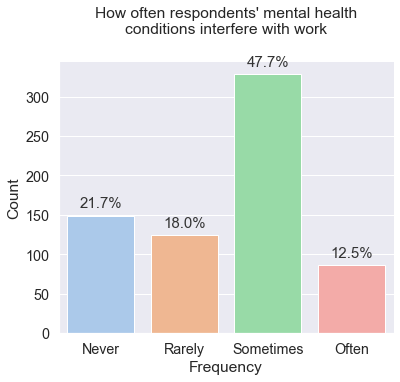

In [213]:
fig, ax = plt.subplots(figsize=(6,5))
g = sns.barplot(data=cond_interfere, x='work_interfere',y='count')

pfg.rel_freq_label(g,0.15,10)

plt.xlabel('Frequency', y=0.9) and plt.ylabel('Count')
g.set_title("How often respondents' mental health\nconditions interfere with work", y=1.08)

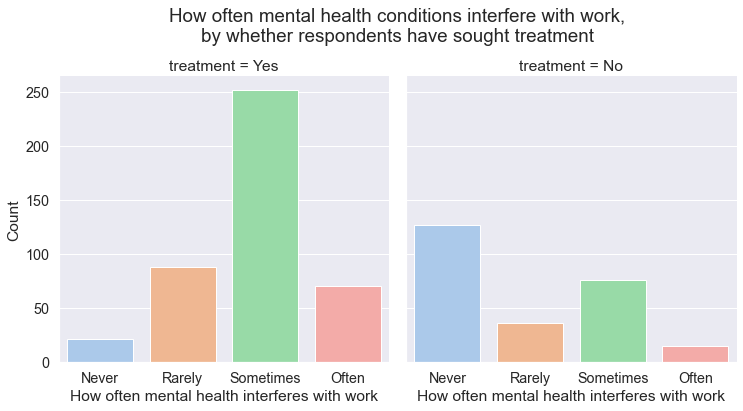

In [214]:
# reference: https://seaborn.pydata.org/generated/seaborn.catplot.html

g = sns.catplot(x="work_interfere", col="treatment", col_wrap=4,
                data=mh_filtered_condition,
                kind="count", height=5, aspect=1, order=sorted_freq_labels
                )
g.fig.suptitle('How often mental health conditions interfere with work,\nby whether respondents have sought treatment', x=0.27, y=1.1)
g.set_axis_labels("How often mental health interferes with work", 'Count')

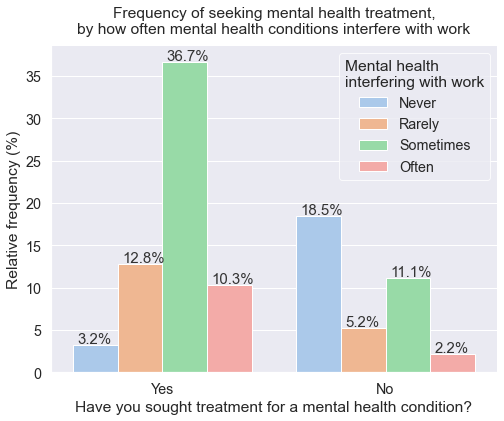

In [215]:
# another way to visualize work_interfere and treatment all at once

fig, ax = plt.subplots(figsize=(8,6))

g = sns.barplot(data=treatmt_interfere_idx, x='treatment', y='rel_freq', hue='work_interfere', order=['Yes', 'No'])

pfg.rel_freq_label(g,0.02,0.2)

plt.title('Frequency of seeking mental health treatment,\nby how often mental health conditions interfere with work',y=1.02)
plt.ylabel('Relative frequency (%)') and plt.xlabel(treatment)
plt.legend(title='Mental health\ninterfering with work', edgecolor='1')

- 58.2% of those who have sought mental health treatment say that their mental health condition *sometimes* interferes with their work, whereas only 29.9% of those who have not sought treatment responded similarly.
    - Mental health interferes with work more often for those who have sought treatment for a mental health issue than for people who have not sought treatment for a mental health issue.
    - This is interesting because these plots only include data from people with a mental health condition, and treatment would be expected to reduce the interference of mental health concerns.
    - For people who have *not* sought mental health treatment, despite indicating a mental health condition, most feel that their condition never interferes with work.
- For people with a mental health condition, almost half (47.74%) feel that it interferes with their work sometimes.
    - Interestingly, however, almost a quarter (21.69%) feel that their mental health condition never interfere with their work.

# Focused analysis
## Knowledge and provision of mental health resources + relationships with mental health quality

#### **Research questions**
1. Is there a relationship between providing more mental health resources and quality of employees' mental health in the tech industry?
2. Is there a relationship between employees' knowledge of the mental health resources available and the quality of mental health?

**How mental health was assessed**

There was no question that directly asked about participants' mental health, so mental health was inferred based on whether participants judged the **work_interfere** question to be applicable to them. Data was grouped to give a count of those supposedly *with* a mental health condition (those who answered with anything but N/A) and those *without* a mental health condition (those who answered with N/A). This information is contained in the **condition** column, which tells us whether or not respondents might have a mental health condition.

The **work_interfere** variable can also be used as a rough proxy for the severity of mental health conditions among respondents. I say "rough" because the question ("If you have a mental health condition, do you feel that it interferes with your work?") only looks at the severity and effects of mental health in the workplace, ignoring how it may manifest in other areas of one's life.

Additionally, the **treatment** variable can tell us a little bit about the state of mental health among respondents. However, it's necessary to point out that not everyone who faces mental health issues will seek out treatment for said issues. From the EDA, it also seems like having sought treatment doesn't necessarily guarantee that mental health is less of a concern. Thus, this variable is also merely a rough proxy. It also seems more appropriate to deem it as an indication of resources available to respondents.
<br><br>

**How knowledge of mental health resources was assessed**

Although the only question that directly asked about participants' knowledge of mental health resources was **care_options**, I created the **knowledge** column to categorize participants according to their knowledge of mental health resources. This was assessed based on how often respondents chose "Don't know" or "Not sure" to questions that assessed both knowledge and provision of mental health resources (benefits, care_options, wellness_program, seek_help). This isn't a perfect way of scoring knowledge, but it does give a general idea of the level of uncertainty, which I have chosen as an indication of the general state of knowledge regarding mental health resources.

Here are the categories:

| Level of knowledge | # of "Don't know"/"Not sure" responses (out of 4 questions) |
| -------- | -----------|
| "Not knowledgeable" | 3–4 |
| "Somewhat knowledgeable" | 2 |
| "Knowledgeable" | 0–1 |

<br><br>
**How provision of mental health resources was assessed**

In the **resources** column, if participants responded with "Yes" to 2 or more of the 4 questions that asked about the amount of mental health resources provided by employers (benefits, care_options, wellness_program, seek_help), provision of mental health resources is deemed "Good." If participants responded with "Yes" to less than 2 of these questions, provision is deemed "Poor."

"Resources" include providing mental health benefits (**benefits**), options for mental health care (**care_options**), communication about mental health (**wellness_program**), and resources on whether to seek further information and help (**seek_help**).

---

### 1. Is there a relationship between providing more mental health resources and quality of employees' mental health in the tech industry?

In [216]:
# getting counts and relative frequencies of groups

resources_count = pfg.make_count_df(mh, 'resources')

resources_interfere = pfg.grouped_count_df(mh_filtered_condition,'resources','work_interfere').reindex(sorted_freq_labels, level=1)
pfg.rel_freq_within_grp(resources_interfere)
pfg.make_relfreq_col(resources_interfere)

resources_interfere_idx = resources_interfere.reset_index()

resources_treatmt = pfg.grouped_count_df(mh_filtered_condition,'resources','treatment')
pfg.rel_freq_within_grp(resources_treatmt)
pfg.make_relfreq_col(resources_treatmt)

resources_treatmt_idx = resources_treatmt.reset_index()

display('resources_count','resources_interfere','resources_treatmt')

resources_count
  resources  count  rel_freq
0      Poor    601      68.1
1      Good    282      31.9

resources_interfere
                          count  withingrp_relfreq  rel_freq
resources work_interfere                                    
Good      Never              46               18.6       6.7
          Rarely             51               20.6       7.4
          Sometimes         125               50.6      18.2
          Often              25               10.1       3.6
Poor      Never             103               23.4      15.0
          Rarely             73               16.6      10.6
          Sometimes         203               46.1      29.5
          Often              61               13.9       8.9

resources_treatmt
                     count  withingrp_relfreq  rel_freq
resources treatment                                    
Good      Yes          183               74.1      26.6
          No            64               25.9       9.3
Poor      Yes          250               56.8      36.4
          No           190               43.2      27.7

Text(0.5, 1.05, "Employers' provision of mental health resources")

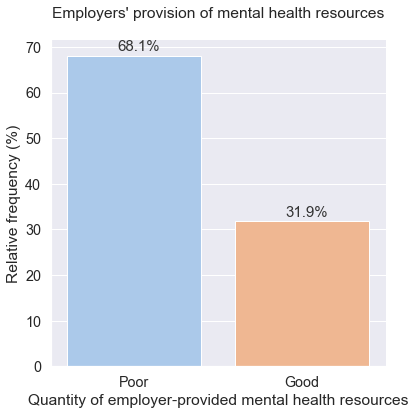

In [217]:
# visualizations! :-)
fig, ax = plt.subplots(figsize=(6,6))

ax0 = sns.barplot(data=resources_count, x='resources', y='rel_freq')
pfg.rel_freq_label(ax0,0.3,1)
ax0.set_xlabel('Quantity of employer-provided mental health resources')
ax0.set_ylabel('Relative frequency (%)')
ax0.set_title("Employers' provision of mental health resources", y=1.05)

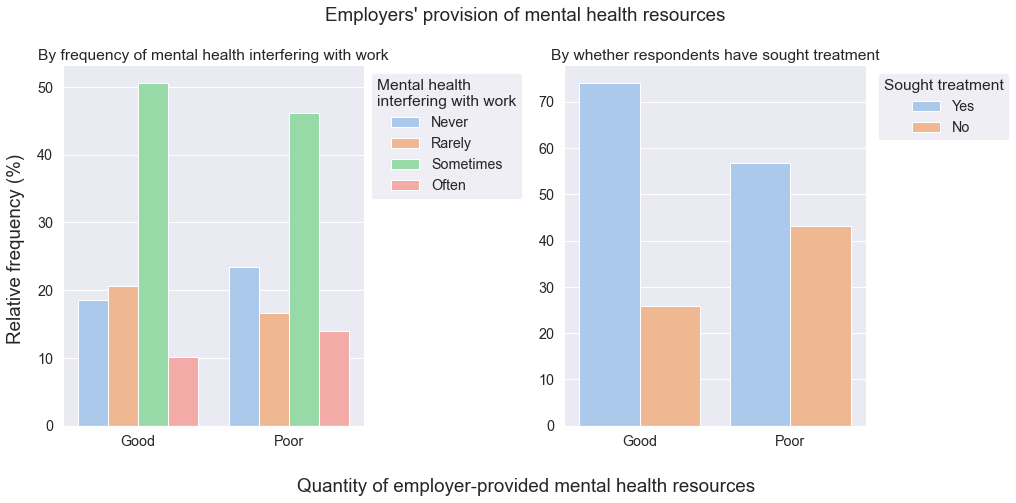

In [218]:
fig, axes = plt.subplots(1,2, sharex=True, figsize=(15,7),edgecolor='1')
fig.supylabel('Relative frequency (%)')
fig.supxlabel('Quantity of employer-provided mental health resources')
fig.suptitle("Employers' provision of mental health resources")

# plot 1: work_interfere
ax0 = sns.barplot(ax=axes[0], data=resources_interfere_idx, x='resources', y='withingrp_relfreq', hue='work_interfere')
ax0.set(ylabel=None,xlabel=None,title='By frequency of mental health interfering with work')
ax0.legend(edgecolor='1', title=work_interfere_legend_title, bbox_to_anchor=(1,1))

# plot 2: treatment
ax1 = sns.barplot(ax=axes[1], data=resources_treatmt_idx, x='resources', y='withingrp_relfreq', hue='treatment')
ax1.set(xlabel=None,ylabel=None,title='By whether respondents have sought treatment')
ax1.legend(edgecolor='1', title='Sought treatment', bbox_to_anchor=(1.5,1))

plt.tight_layout()

**General**
- In general, over half of responses from respondents both with and without a mental health condition (68.1%) indicate that employers do not provide a lot of mental health resources for their employees.

**Resources and how often mental health interferes with work**
- As might be expected, a larger proportion of respondents with poorer provision of mental health resources feel that their mental health condition often interferes with their work (13.9), compared to those who indicate better provision of mental health resources (10.1).
- Interestingly, more people in the "Poor" category of resource provision (23.4%) feel that their mental health condition never interferes with their work than people in the "Good" category (18.6%).
    - Similarly, compared to respondents with better provision of resources, fewer respondents with poor provision of resources feel that their mental health condition either rarely or sometimes interferes with their work. However, this might be due to how more respondents in the "Poor" category feel that their mental health condition *often* interferes with their work.

**Resources and seeking treatment**
- Respondents who indicate having more mental health resources provided to them are more likely to seek treatment for a mental health condition. 
    - 74.1% of those who have more mental health resources provided seek treatment, while 56.8% of those with fewer provided mental health resources have done so, in comparison.
- Although the EDA suggested that seeking treatment does not guarantee recovery, this shows us that being provided with more resources, at the very least, increases accessibility and opens more paths toward mental health treatment.

---

### 2. Is there a relationship between employees' knowledge of the mental health resources available and the quality of mental health?

In [219]:
# reference: https://stackoverflow.com/questions/51211538/pandas-seaborn-countplot-from-several-columns
# counts and relative frequencies 

# overall counts
knowledge_counts_gen = pfg.make_count_df(mh, 'knowledge')
knowledge_counts_cond = pfg.make_count_df(mh_filtered_condition,'knowledge')

# knowledge + work_interfere
knowledge_interfere = (pfg.grouped_count_df(mh_filtered_condition,'knowledge', 'work_interfere')
                       .reindex(sorted_freq_labels, level=1))
pfg.rel_freq_within_grp(knowledge_interfere)
pfg.make_relfreq_col(knowledge_interfere)

knowledge_interfere_idx = knowledge_interfere.reset_index()

# knowledge + treatment
knowledge_treatmt = pfg.grouped_count_df(mh_filtered_condition,'knowledge', 'treatment')
pfg.rel_freq_within_grp(knowledge_treatmt)
pfg.make_relfreq_col(knowledge_treatmt)

knowledge_treatmt_idx = knowledge_treatmt.reset_index()

display('knowledge_counts_gen','knowledge_counts_cond', 'knowledge_interfere', 'knowledge_treatmt')

knowledge_counts_gen
                knowledge  count  rel_freq
0           Knowledgeable    595      67.4
1  Somewhat knowledgeable    163      18.5
2       Not knowledgeable    125      14.2

knowledge_counts_cond
                knowledge  count  rel_freq
0           Knowledgeable    484      70.5
1  Somewhat knowledgeable    118      17.2
2       Not knowledgeable     85      12.4

knowledge_interfere
                                       count  withingrp_relfreq  rel_freq
knowledge              work_interfere                                    
Knowledgeable          Never              80               16.5      11.6
                       Rarely             95               19.6      13.8
                       Sometimes         242               50.0      35.2
                       Often              67               13.8       9.8
Not knowledgeable      Never              28               32.9       4.1
                       Rarely             13               15.3       1.9
                       Sometimes          37               43.5       5.4
                       Often               7                8.2       1.0
Somewhat knowledgeable Never              41               34.7       6.0
                       Rarely             16               13.6       2.3
                       Sometimes          49               41.5       7.1
                       Often              12               10.2       1.7

knowledge_treatmt
                                  count  withingrp_relfreq  rel_freq
knowledge              treatment                                    
Knowledgeable          Yes          321               66.3      46.7
                       No           163               33.7      23.7
Not knowledgeable      Yes           44               51.8       6.4
                       No            41               48.2       6.0
Somewhat knowledgeable Yes           68               57.6       9.9
                       No            50               42.4       7.3

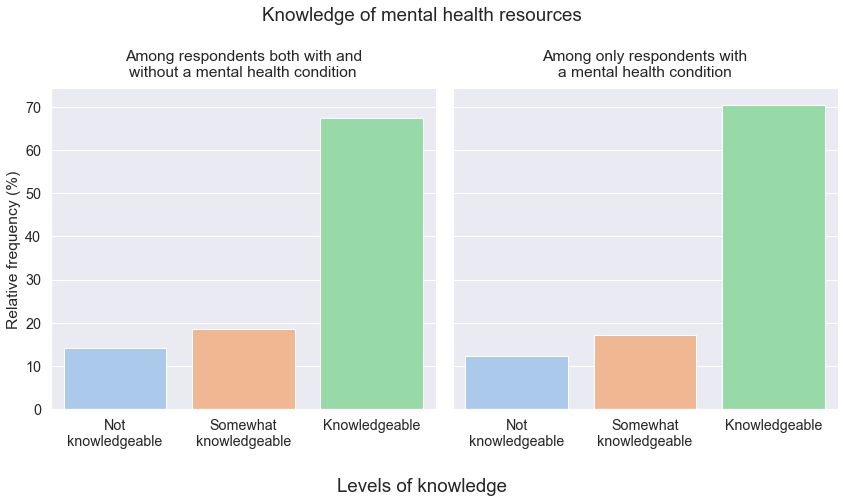

In [266]:
fig, axes = plt.subplots(1,2,figsize=(12,7),sharex=True, sharey=True)
fig.suptitle('Knowledge of mental health resources')
fig.supxlabel('Levels of knowledge')

# plot 1: knowledge freq + with/without mental health condition
ax0 = sns.barplot(ax=axes[0], data=knowledge_counts_gen, x='knowledge', y='rel_freq', order=sorted_knowledge_labels)
ax0.set(xlabel=None,ylabel='Relative frequency (%)')
ax0.set_title('Among respondents both with and\nwithout a mental health condition', y=1.02)

# plot 2: knowledge freq only for those with a condition
ax1 = sns.barplot(ax=axes[1], data=knowledge_counts_cond,x='knowledge', y='rel_freq', order=sorted_knowledge_labels)
ax1.set(xlabel=None,ylabel=None)
ax1.set_title('Among only respondents with\na mental health condition', y=1.02)

plt.xticks([0,1,2], knowledge_labels_fit)
plt.tight_layout()

C:\Users\peate\miniconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


TypeError: 'NoneType' object is not iterable

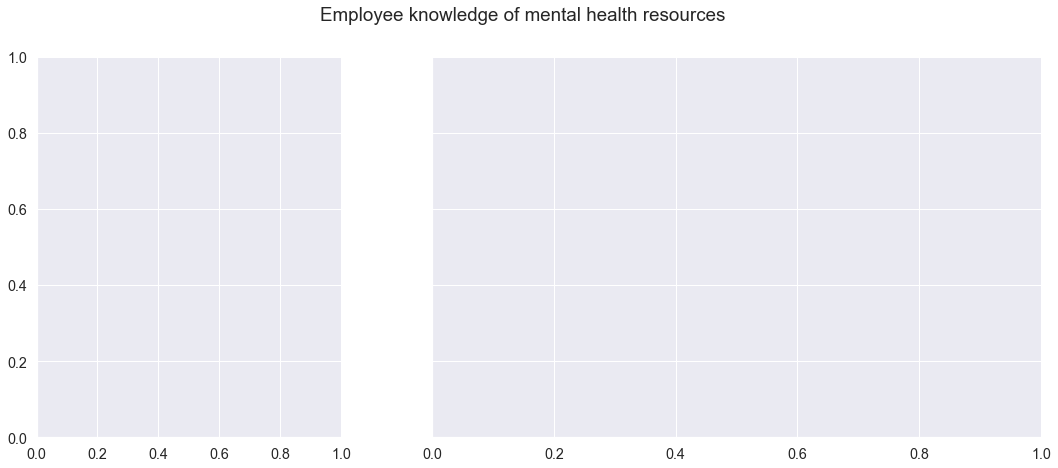

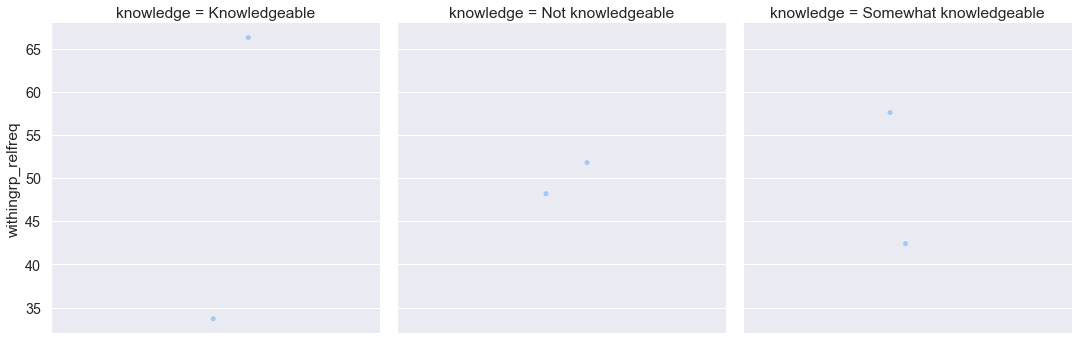

In [267]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(18,7),gridspec_kw={'width_ratios': [1,2]})
fig.suptitle('Employee knowledge of mental health resources')

# plot 1: work_interfere
ax0 = sns.catplot(ax=axes[0], kind='bar', data=knowledge_treatmt_idx, y='withingrp_relfreq', col='knowledge', order=sorted_knowledge_labels, hue='treatment')

pfg.rel_freq_label(ax0, 0.03,0.8)
ax0.set_ylabel('Relative frequency (%)')
ax0.set_xlabel('Level of knowledge', labelpad=10)

ax0.set_xticklabels(['Not\nknowledgeable', 'Somewhat\nknowledgeable', 'Knowledgeable'])

ax0.set_title('By whether respondents have sought treatment', y=1.02)
ax0.legend(title='Sought treatment', edgecolor='1')

# plot 2: treatment
ax1 = sns.barplot(ax=axes[1], data=knowledge_interfere_idx, y='rel_freq', x='knowledge', order=sorted_knowledge_labels, hue='work_interfere')

pfg.rel_freq_label(ax1,0.01,0.8)
ax1.legend(title='Mental health condition\ninterfering with work',edgecolor='1', loc='upper left')
ax1.set_xlabel('Level of knowledge', labelpad=10)
ax1.set_xticklabels(['Not\nknowledgeable', 'Somewhat\nknowledgeable', 'Knowledgeable'])

ax1.set_title('By frequency of mental health interfering with work', y=1.02)

# removing inner labels
for ax in axes.flat:
    ax.label_outer()
    
plt.tight_layout()

- When compared to both respondents with or without a mental health condition, respondents with a mental health condition 
- Out of respondents with a mental health conditions, those with more knowledge about mental health resources are also more likely to have sought treatment.
    - "Knowledgeable" respondents are roughly 7x more likely to seek treatment than "Not knowledgeable" respondents

---

# Discussion and Conclusions

- Knowledge of what mental health resources are available seems to contribute to the improvement of handling mental health issues. Thus, employers might need to be more intentional about informing employees about the resources available.

Unfortunately, 